In [1]:
# Python program showing Graphical 
# representation of tanh() function 
import numpy as np 
import matplotlib.pyplot as plt
import scipy.special
import tensorflow as tf

In [2]:
outputFolderName = "./plots_functions"
extensions = "png,pdf"

In [15]:
np.tanh(np.pi)

0.99627207622075

nparray_input [-3.  -2.7 -2.4 -2.1 -1.8 -1.5 -1.2 -0.9 -0.6 -0.3  0.   0.3  0.6  0.9
  1.2  1.5  1.8  2.1  2.4  2.7  3. ]
nparray_output_1 [-0.99505475 -0.99100745 -0.98367486 -0.97045194 -0.94680601 -0.90514825
 -0.83365461 -0.71629787 -0.53704957 -0.29131261  0.          0.29131261
  0.53704957  0.71629787  0.83365461  0.90514825  0.94680601  0.97045194
  0.98367486  0.99100745  0.99505475]
nparray_output_2 [0.04742587 0.06297336 0.0831727  0.10909682 0.14185106 0.18242552
 0.23147522 0.2890505  0.35434369 0.42555748 0.5        0.57444252
 0.64565631 0.7109495  0.76852478 0.81757448 0.85814894 0.89090318
 0.9168273  0.93702664 0.95257413]


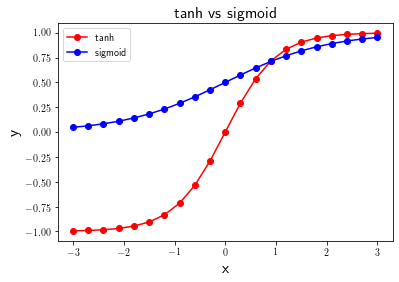

In [14]:
# create numpy array with values
nparray_input = np.linspace(-3.0, 3.0, 21) 
nparray_output_1 = np.tanh(nparray_input) # hyperbolic tangent
nparray_output_2 = scipy.special.expit(nparray_input) # sigmoid
print("nparray_input", nparray_input) 
print("nparray_output_1", nparray_output_1) 
print("nparray_output_2", nparray_output_2)

# create plot
plt.plot(nparray_input, nparray_output_1, color = 'red', marker = "o", label = "tanh") 
plt.plot(nparray_input, nparray_output_2, color = 'blue', marker = "o", label = "sigmoid") 
plt.title("tanh vs sigmoid", fontsize = 16)
plt.legend()
plt.xlabel("x", fontsize = 16) 
plt.ylabel("y", fontsize = 16) 
for extension in extensions.split(","):
    plt.savefig(outputFolderName+"/ActivationFunctionsLastLayer1."+extension)

In [4]:
# soft sign or SOSI
def soft_sign(x):
    # return tf.nn.softsign(x)
    return x / (1+abs(x))

In [5]:
# to use as activation function between -1 and 1, so instead of tanh
# code from the answer to
# https://stackoverflow.com/questions/57023350/implementing-the-square-non-linearity-sqnl-activation-function-in-keras
# square non linear or SQNL
def square_non_linear(x):
    orig = x
    x = tf.where(orig >2.0, (tf.ones_like(x)) , x)
    x = tf.where(tf.logical_and(0.0 <= orig, orig <=2.0), (x - tf.math.square(x)/4.), x)
    x = tf.where(tf.logical_and(-2.0 <= orig, orig < 0), (x + tf.math.square(x)/4.), x)
    return tf.where(orig < -2.0, 0*x-1.0, x)

nparray_input [-3.  -2.7 -2.4 -2.1 -1.8 -1.5 -1.2 -0.9 -0.6 -0.3  0.   0.3  0.6  0.9
  1.2  1.5  1.8  2.1  2.4  2.7  3. ]
nparray_output_1 [-0.99505475 -0.99100745 -0.98367486 -0.97045194 -0.94680601 -0.90514825
 -0.83365461 -0.71629787 -0.53704957 -0.29131261  0.          0.29131261
  0.53704957  0.71629787  0.83365461  0.90514825  0.94680601  0.97045194
  0.98367486  0.99100745  0.99505475]
nparray_output_2 [-1.         -1.         -1.         -1.         -0.99000001 -0.9375
 -0.84000003 -0.69749999 -0.50999999 -0.2775      0.          0.2775
  0.50999999  0.69749999  0.84000003  0.9375      0.99000001  1.
  1.          1.          1.        ]
nparray_output_3 [-0.75       -0.72972973 -0.70588235 -0.67741935 -0.64285714 -0.6
 -0.54545455 -0.47368421 -0.375      -0.23076923  0.          0.23076923
  0.375       0.47368421  0.54545455  0.6         0.64285714  0.67741935
  0.70588235  0.72972973  0.75      ]


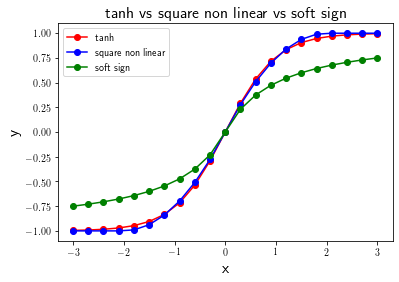

In [13]:
# create numpy array with values
nparray_input = np.linspace(-3.0, 3.0, 21) 
nparray_output_1 = np.tanh(nparray_input) # hyperbolic tangent
nparray_output_2 = np.vectorize(square_non_linear, otypes = ['float'])(nparray_input) # SQNL
nparray_output_3 = np.vectorize(soft_sign, otypes = ['float'])(nparray_input) # SOSI
print("nparray_input", nparray_input) 
print("nparray_output_1", nparray_output_1) 
print("nparray_output_2", nparray_output_2)
print("nparray_output_3", nparray_output_3)

# create plot
plt.plot(nparray_input, nparray_output_1, color = 'red', marker = "o", label = "tanh") 
plt.plot(nparray_input, nparray_output_2, color = 'blue', marker = "o", label = "square non linear") 
plt.plot(nparray_input, nparray_output_3, color = 'green', marker = "o", label = "soft sign") 

plt.title("tanh vs square non linear vs soft sign", fontsize = 16)
plt.legend()
plt.xlabel("x", fontsize = 16) 
plt.ylabel("y", fontsize = 16) 
for extension in extensions.split(","):
    plt.savefig(outputFolderName+"/ActivationFunctionsLastLayer2."+extension)

nparray_input [-3.  -2.7 -2.4 -2.1 -1.8 -1.5 -1.2 -0.9 -0.6 -0.3  0.   0.3  0.6  0.9
  1.2  1.5  1.8  2.1  2.4  2.7  3. ]
nparray_output_1 [3.  2.8 2.6 2.4 2.2 2.  1.8 1.6 1.4 1.2 1.  0.8 0.6 0.4 0.2 0.  0.  0.
 0.  0.  0. ]
nparray_output_2 [9.   7.84 6.76 5.76 4.84 4.   3.24 2.56 1.96 1.44 1.   0.64 0.36 0.16
 0.04 0.   0.   0.   0.   0.   0.  ]


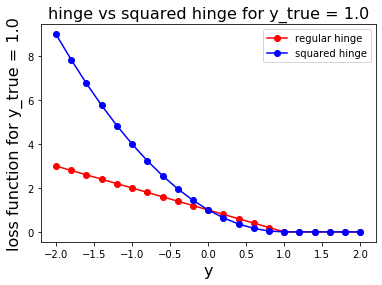

In [7]:
y_true = 1.0
nparray_y = np.linspace(-2.0, 2.0, 21)
nparray_output_1 = np.maximum(0.0, 1.0 - y_true * nparray_y)
nparray_output_2 = np.square(np.maximum(0.0, 1.0 - y_true * nparray_y))
print("nparray_input", nparray_input) 
print("nparray_output_1", nparray_output_1) 
print("nparray_output_2", nparray_output_2)

# create plot
plt.plot(nparray_y, nparray_output_1, color = 'red', marker = "o", label = "regular hinge") 
plt.plot(nparray_y, nparray_output_2, color = 'blue', marker = "o", label = "squared hinge") 
plt.title("hinge vs squared hinge for y_true = 1.0", fontsize = 16)
plt.legend()
plt.xlabel("y", fontsize = 16) 
plt.ylabel("loss function for y_true = 1.0", fontsize = 16) 
for extension in extensions.split(","):
    plt.savefig(outputFolderName+"/LossFunctions_PlusOne."+extension)

nparray_input [-3.  -2.7 -2.4 -2.1 -1.8 -1.5 -1.2 -0.9 -0.6 -0.3  0.   0.3  0.6  0.9
  1.2  1.5  1.8  2.1  2.4  2.7  3. ]
nparray_output_1 [0.  0.  0.  0.  0.  0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4
 2.6 2.8 3. ]
nparray_output_2 [0.   0.   0.   0.   0.   0.   0.04 0.16 0.36 0.64 1.   1.44 1.96 2.56
 3.24 4.   4.84 5.76 6.76 7.84 9.  ]


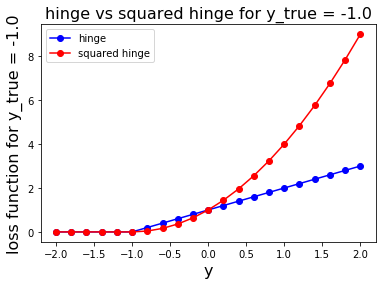

In [8]:
y_true = -1.0
nparray_y = np.linspace(-2.0, 2.0, 21)
nparray_output_1 = np.maximum(0.0, 1.0 - y_true * nparray_y)
nparray_output_2 = np.square(np.maximum(0.0, 1.0 - y_true * nparray_y))
print("nparray_input", nparray_input) 
print("nparray_output_1", nparray_output_1) 
print("nparray_output_2", nparray_output_2)

# create plot
plt.plot(nparray_y, nparray_output_1, color = 'red', marker = "o", label = "regular hinge") 
plt.plot(nparray_y, nparray_output_2, color = 'blue', marker = "o", label = "squared hinge") 
plt.title("hinge vs squared hinge for y_true = -1.0", fontsize = 16)
plt.legend()
plt.xlabel("y", fontsize = 16) 
plt.ylabel("loss function for y_true = -1.0", fontsize = 16) 
for extension in extensions.split(","):
    plt.savefig(outputFolderName+"/LossFunctions_MinusOne."+extension)

In [9]:
def function_relu(x):
    if x < 0:
        return 0
    else:
        return x

In [10]:
def function_elu(x, alpha):
    if x < 0:
        return alpha*(np.exp(x)-1)
    else:
        return x

nparray_input [-3.  -2.7 -2.4 -2.1 -1.8 -1.5 -1.2 -0.9 -0.6 -0.3  0.   0.3  0.6  0.9
  1.2  1.5  1.8  2.1  2.4  2.7  3. ]
nparray_output_1 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.3 0.6 0.9 1.2 1.5 1.8 2.1
 2.4 2.7 3. ]
nparray_output_2 [-0.95021293 -0.93279449 -0.90928205 -0.87754357 -0.83470111 -0.77686984
 -0.69880579 -0.59343034 -0.45118836 -0.25918178  0.          0.3
  0.6         0.9         1.2         1.5         1.8         2.1
  2.4         2.7         3.        ]


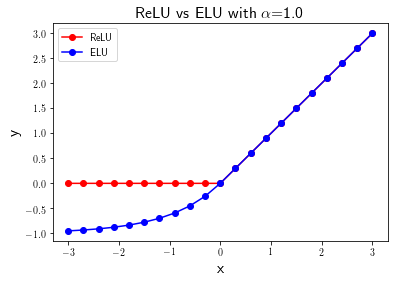

In [12]:
# create numpy array with values
nparray_input = np.linspace(-3.0, 3.0, 21) 
nparray_output_1 = np.vectorize(function_relu, otypes = ['float'])(nparray_input) # ReLU
nparray_output_2 = np.vectorize(function_elu, otypes = ['float'])(nparray_input, alpha = 1.0) # ELU
print("nparray_input", nparray_input) 
print("nparray_output_1", nparray_output_1)
print("nparray_output_2", nparray_output_2)

# create plot 
plt.rc('text', usetex=True)
plt.plot(nparray_input, nparray_output_1, color = 'red', marker = "o", label = "ReLU")
plt.plot(nparray_input, nparray_output_2, color = 'blue', marker = "o", label = "ELU") 
plt.title(r"ReLU vs ELU with $\alpha$=1.0", fontsize = 16)
plt.legend()
plt.xlabel("x", fontsize = 16) 
plt.ylabel("y", fontsize = 16) 
for extension in extensions.split(","):
    plt.savefig(outputFolderName+"/ActivationFunctionsHiddenLayers."+extension)